<a href="https://colab.research.google.com/github/ChicagoDataScientist/SprintChallenge1/blob/master/social_security_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# import libraries

import requests
import lxml.html as lh
import pandas as pd
import requests
import html5lib
import bs4
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pylab as plt
from scipy import stats


In [2]:
# Import social security data on csv
# csv was created by scraping website with 3rd party software, then saving to github
df1 = pd.read_csv('https://raw.githubusercontent.com/ChicagoDataScientist/datafiles/master/sssi_outcomes.csv', header=None)
df1.head(20)

,0,1,2,3,4,5,6,7,8,9
0,1999,"1,265,037",0,"104,332","445,995","4,056","708,797","1,857",56.0,61.3
1,2000,"1,364,323",0,"136,054","456,467","3,817","766,047","1,938",56.1,62.6
2,2001,"1,513,411",0,"170,520","496,835","3,579","840,542","1,935",55.5,62.8
3,2002,"1,715,710",0,"231,067","580,430","4,067","898,047","2,099",52.3,60.7
4,2003,"1,941,894",0,"374,305","632,284","4,485","928,747","2,073",47.8,59.5
5,2004,"2,262,119",0,"615,672","677,811","5,634","961,376","1,626",42.5,58.5
6,2005,"2,087,733",0,"528,760","642,170","6,964","907,877","1,962",43.5,58.4
7,2006,"2,164,394",0,"611,199","653,256","7,270","890,752","1,917",41.2,57.5
8,2007,"2,216,564",0,"651,759","641,906","7,914","913,167","1,818",41.2,58.5
9,2008,"2,358,629",0,"717,160","661,044","9,024","969,623","1,778",41.1,59.2


In [0]:
# remove commas from numbers
df1 = df1.replace(',','', regex=True)

In [4]:
# Label columns

df1.columns = ['Year','Total','Pending',
               'Technical Denial','Medical Denial','Subsequent Nonmedical Denial',
               'Award','Denial After Allowance','Award Percent Rate', "Allowance Percent Rate"]
df1.head()

,Year,Total,Pending,Technical Denial,Medical Denial,Subsequent Nonmedical Denial,Award,Denial After Allowance,Award Percent Rate,Allowance Percent Rate
0,1999,1265037,0,104332,445995,4056,708797,1857,56.0,61.3
1,2000,1364323,0,136054,456467,3817,766047,1938,56.1,62.6
2,2001,1513411,0,170520,496835,3579,840542,1935,55.5,62.8
3,2002,1715710,0,231067,580430,4067,898047,2099,52.3,60.7
4,2003,1941894,0,374305,632284,4485,928747,2073,47.8,59.5


In [5]:
# Examine data types

df1.dtypes

Year                              int64
Total                            object
Pending                          object
Technical Denial                 object
Medical Denial                   object
Subsequent Nonmedical Denial     object
Award                            object
Denial After Allowance           object
Award Percent Rate              float64
Allowance Percent Rate          float64
dtype: object

In [0]:
# Convert objects into numeric data types

df1['Total'] = pd.to_numeric(df1['Total'])
df1['Pending'] = pd.to_numeric(df1['Pending'])
df1['Technical Denial'] = pd.to_numeric(df1['Technical Denial'])
df1['Medical Denial'] = pd.to_numeric(df1['Medical Denial'])
df1['Subsequent Nonmedical Denial'] = pd.to_numeric(df1['Subsequent Nonmedical Denial'])
df1['Award'] = pd.to_numeric(df1['Award'])
df1['Denial After Allowance'] = pd.to_numeric(df1['Denial After Allowance'])


In [0]:
# Create new features 

df1['Total Denials'] = df1['Technical Denial'] + df1['Medical Denial'] + df1['Subsequent Nonmedical Denial'] + df1['Denial After Allowance']
df1['Tot Technical Denials'] = df1['Technical Denial'] + df1['Subsequent Nonmedical Denial'] + df1['Denial After Allowance']
df1['Tot Tech Denial Pct'] = df1['Technical Denial'] / (df1['Total']-df1['Pending'])
df1['Medical Denial Pct'] = df1['Medical Denial'] / (df1['Total']-df1['Pending'])

In [8]:
# Check dataframe

df1.head()

,Year,Total,Pending,Technical Denial,Medical Denial,Subsequent Nonmedical Denial,Award,Denial After Allowance,Award Percent Rate,Allowance Percent Rate,Total Denials,Tot Technical Denials,Tot Tech Denial Pct,Medical Denial Pct
0,1999,1265037,0,104332,445995,4056,708797,1857,56.0,61.3,556240,110245,0.082473,0.352555
1,2000,1364323,0,136054,456467,3817,766047,1938,56.1,62.6,598276,141809,0.099723,0.334574
2,2001,1513411,0,170520,496835,3579,840542,1935,55.5,62.8,672869,176034,0.112673,0.328288
3,2002,1715710,0,231067,580430,4067,898047,2099,52.3,60.7,817663,237233,0.134677,0.338303
4,2003,1941894,0,374305,632284,4485,928747,2073,47.8,59.5,1013147,380863,0.192753,0.325602


In [9]:
df1.tail()

,Year,Total,Pending,Technical Denial,Medical Denial,Subsequent Nonmedical Denial,Award,Denial After Allowance,Award Percent Rate,Allowance Percent Rate,Total Denials,Tot Technical Denials,Tot Tech Denial Pct,Medical Denial Pct
12,2011,2952087,10416,982064,866486,20813,1070241,2067,36.4,54.8,1871430,1004944,0.333846,0.294556
13,2012,2955922,26864,1024683,849946,23956,1028187,2286,35.1,54.2,1900871,1050925,0.349834,0.290177
14,2013,2790682,117452,970984,749185,25392,925409,2260,34.6,54.6,1747821,998636,0.363225,0.280255
15,2014,2682401,342623,938339,625139,29154,744849,2297,31.8,53.4,1594929,969790,0.401038,0.267179
16,2015,2505290,393292,901422,573186,28138,607175,2077,28.7,50.4,1504823,931637,0.426810,0.271395


In [0]:
# Reset button for testing new Seaborn features

# sns.reset_defaults()

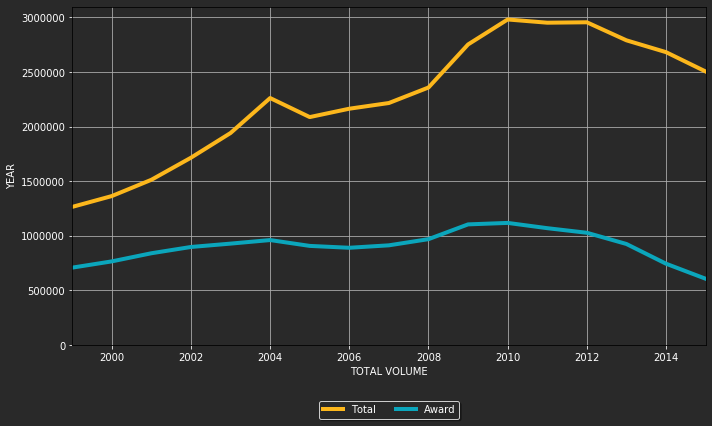

In [10]:
# Create and export stacked area chart for presentation.
sns.set_style({'axes.facecolor': '#292929',
 'figure.facecolor': '#292929', 'axes.labelcolor': 'w',
 'text.color': 'w',
 'xtick.color': 'w',
 'ytick.color': 'w',
 })

df1.plot(x="Year", y=['Total', 'Award'], figsize=(10,6), grid=True, linewidth=4.0, color =('#FCB71C', "#0BA6BC"))
plt.axis([1999, 2015, 0, 3100000])
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), shadow=True, ncol=2)
plt.xlabel('TOTAL VOLUME')
plt.ylabel('YEAR')
plt.tight_layout()
plt.savefig('linegraph.png')

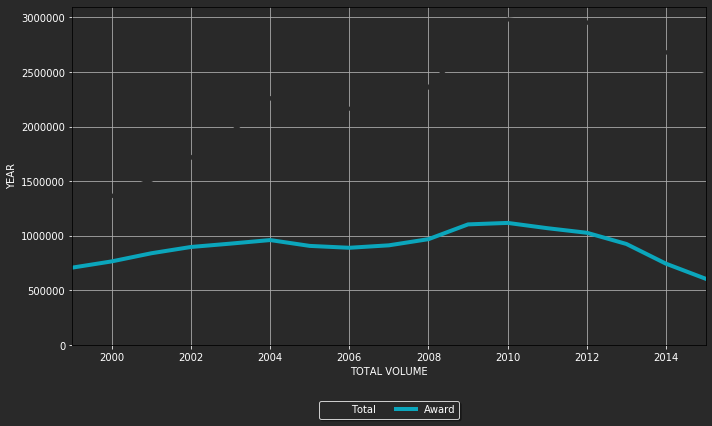

In [11]:
# For presentation build

sns.set_style({'axes.facecolor': '#292929',
 'figure.facecolor': '#292929', 'axes.labelcolor': 'w',
 'text.color': 'w',
 'xtick.color': 'w',
 'ytick.color': 'w',
 })

df1.plot(x="Year", y=['Total', 'Award'], figsize=(10,6), grid=True, linewidth=4.0, color =('#292929', "#0BA6BC"))
plt.axis([1999, 2015, 0, 3100000])
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), shadow=True, ncol=2)
plt.xlabel('TOTAL VOLUME')
plt.ylabel('YEAR')
plt.tight_layout()
plt.savefig('linegraph2.png')

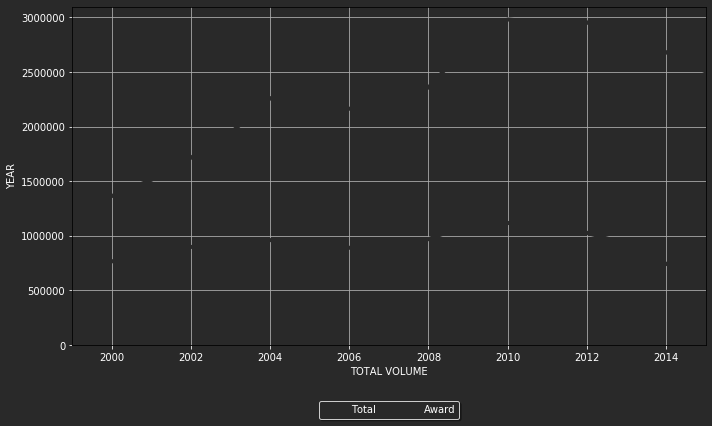

In [12]:
# For presentation build

sns.set_style({'axes.facecolor': '#292929',
 'figure.facecolor': '#292929', 'axes.labelcolor': 'w',
 'text.color': 'w',
 'xtick.color': 'w',
 'ytick.color': 'w',
 })

df1.plot(x="Year", y=['Total', 'Award'], figsize=(10,6), grid=True, linewidth=4.0, color =('#292929', "#292929"))
plt.axis([1999, 2015, 0, 3100000])
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), shadow=True, ncol=2)
plt.xlabel('TOTAL VOLUME')
plt.ylabel('YEAR')
plt.tight_layout()
plt.savefig('linegraph3.png')

In [0]:
# Convert feature for stacked plot

df1['Award Percent Rate'] = df1['Award Percent Rate']/100

In [0]:
# export to cvs for later analysis

df1.to_csv('df1.csv')

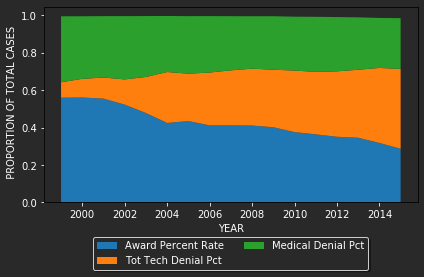

In [15]:
# Create and export stacked area chart for presentation.

sns.set_style({'axes.facecolor': '#292929',
 'figure.facecolor': '#292929', 'axes.labelcolor': 'w',
 'text.color': 'w',
 'xtick.color': 'w',
 'ytick.color': 'w',
 })

plt.stackplot(df1['Year'],df1['Award Percent Rate'], df1['Tot Tech Denial Pct'],
              df1['Medical Denial Pct'], labels=['Award Percent Rate',
                                                 'Tot Tech Denial Pct',
                                                 'Medical Denial Pct'])
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), shadow=True, ncol=2)
plt.xlabel('YEAR')
plt.ylabel('  PROPORTION OF TOTAL CASES')

plt.tight_layout()
plt.savefig('stackgraph.png')

In [16]:
# Create new features

df1['Award Percent Excluting Technical Denials'] = df1['Award Percent Rate']/(df1['Award Percent Rate']+df1['Medical Denial Pct'])
df1['Medical Denial Percent Excluting Technical Denials'] = df1['Medical Denial Pct']/(df1['Award Percent Rate']+df1['Medical Denial Pct'])
df1.head(5)

,Year,Total,Pending,Technical Denial,Medical Denial,Subsequent Nonmedical Denial,Award,Denial After Allowance,Award Percent Rate,Allowance Percent Rate,Total Denials,Tot Technical Denials,Tot Tech Denial Pct,Medical Denial Pct,Award Percent Excluting Technical Denials,Medical Denial Percent Excluting Technical Denials
0,1999,1265037,0,104332,445995,4056,708797,1857,0.560,61.3,556240,110245,0.082473,0.352555,0.613662,0.386338
1,2000,1364323,0,136054,456467,3817,766047,1938,0.561,62.6,598276,141809,0.099723,0.334574,0.626414,0.373586
2,2001,1513411,0,170520,496835,3579,840542,1935,0.555,62.8,672869,176034,0.112673,0.328288,0.628334,0.371666
3,2002,1715710,0,231067,580430,4067,898047,2099,0.523,60.7,817663,237233,0.134677,0.338303,0.607219,0.392781
4,2003,1941894,0,374305,632284,4485,928747,2073,0.478,59.5,1013147,380863,0.192753,0.325602,0.594822,0.405178


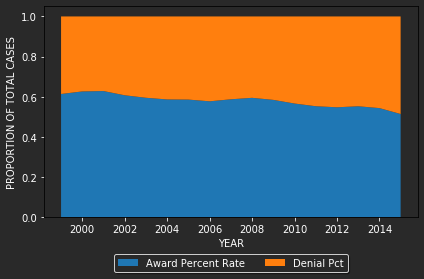

In [17]:
# Create and export stacked area chart for presentation.

plt.stackplot(df1['Year'],df1['Award Percent Excluting Technical Denials'], df1['Medical Denial Percent Excluting Technical Denials'],
              labels=['Award Percent Rate','Denial Pct'])
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), shadow=True, ncol=2)
plt.xlabel('YEAR')
plt.ylabel('PROPORTION OF TOTAL CASES')
plt.tight_layout()
plt.savefig('stackgraph2.png')

In [18]:
# Exploratory data analysis

df1.corr()

,Year,Total,Pending,Technical Denial,Medical Denial,Subsequent Nonmedical Denial,Award,Denial After Allowance,Award Percent Rate,Allowance Percent Rate,Total Denials,Tot Technical Denials,Tot Tech Denial Pct,Medical Denial Pct,Award Percent Excluting Technical Denials,Medical Denial Percent Excluting Technical Denials
Year,1.000000,0.897973,0.653301,0.948114,0.648226,0.934756,0.151214,0.541496,-0.971391,-0.940972,0.898533,0.951917,0.966762,-0.922297,-0.936434,0.936434
Total,0.897973,1.000000,0.301403,0.983895,0.908836,0.782545,0.552217,0.406191,-0.898673,-0.804580,0.997058,0.982451,0.903294,-0.858956,-0.810522,0.810522
Pending,0.653301,0.301403,1.000000,0.416167,-0.099450,0.740441,-0.593886,0.483296,-0.618322,-0.729295,0.289870,0.427313,0.593840,-0.552488,-0.709964,0.709964
Technical Denial,0.948114,0.983895,0.416167,1.000000,0.833300,0.843003,0.416004,0.409120,-0.952176,-0.870722,0.988104,0.999878,0.955616,-0.913303,-0.873341,0.873341
Medical Denial,0.648226,0.908836,-0.099450,0.833300,1.000000,0.515934,0.821448,0.288189,-0.662578,-0.549634,0.908253,0.827892,0.666738,-0.606757,-0.565933,0.565933
Subsequent Nonmedical Denial,0.934756,0.782545,0.740441,0.843003,0.515934,1.000000,-0.024105,0.705889,-0.870261,-0.926955,0.785013,0.851287,0.844951,-0.766493,-0.916346,0.916346
Award,0.151214,0.552217,-0.593886,0.416004,0.821448,-0.024105,1.000000,-0.065042,-0.166259,0.016920,0.541044,0.405219,0.196066,-0.214427,-0.003245,0.003245
Denial After Allowance,0.541496,0.406191,0.483296,0.409120,0.288189,0.705889,-0.065042,1.000000,-0.415930,-0.550645,0.396891,0.419746,0.368325,-0.250761,-0.542492,0.542492
Award Percent Rate,-0.971391,-0.898673,-0.618322,-0.952176,-0.662578,-0.870261,-0.166259,-0.415930,1.000000,0.953326,-0.904249,-0.953986,-0.995873,0.937717,0.954040,-0.954040
Allowance Percent Rate,-0.940972,-0.804580,-0.729295,-0.870722,-0.549634,-0.926955,0.016920,-0.550645,0.953326,1.000000,-0.813380,-0.876183,-0.924142,0.808938,0.999330,-0.999330


In [19]:
# Import additional social security data on csv
# csv was created by scraping website with 3rd party software, then saving to github

df4 = pd.read_csv('https://raw.githubusercontent.com/ChicagoDataScientist/datafiles/master/medical_denial_reasons.csv')
df4.head()

,Year,Unnamed: 1,Total,Impairment did not or is not expected to last 12 months,Impairment is not severe,Able to do usual past work,Able to do other type of work,Other
0,1999,NaN,"450,051",10.2,17.8,28.3,30.8,12.9
1,2000,NaN,"460,284",10.0,17.2,28.2,30.4,14.1
2,2001,NaN,"500,414",9.2,16.7,28.0,31.1,14.9
3,2002,NaN,"584,497",8.5,17.1,28.2,31.3,14.9
4,2003,NaN,"636,769",7.5,17.7,28.2,31.8,14.9


In [0]:
# remove unnecessary columns

df4 = df4.drop(['Unnamed: 1'], axis=1)

In [21]:
# Examine data types

df4.dtypes

Year                                                         int64
Total                                                       object
Impairment did not or is not expected to last 12 months    float64
Impairment is not severe                                   float64
Able to do usual past work                                 float64
Able to do other type of work                              float64
Other                                                      float64
dtype: object

In [0]:
# Rename columns

df4=df4.rename(columns={'Impairment did not or is not expected to last 12 months': '<12 Month Disability'})

In [23]:
# Check dataframe

df4.head()


,Year,Total,<12 Month Disability,Impairment is not severe,Able to do usual past work,Able to do other type of work,Other
0,1999,"450,051",10.2,17.8,28.3,30.8,12.9
1,2000,"460,284",10.0,17.2,28.2,30.4,14.1
2,2001,"500,414",9.2,16.7,28.0,31.1,14.9
3,2002,"584,497",8.5,17.1,28.2,31.3,14.9
4,2003,"636,769",7.5,17.7,28.2,31.8,14.9


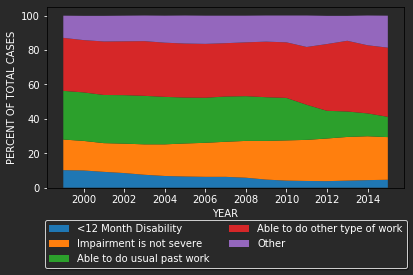

In [24]:
# Create and export stacked area chart for presentation.

plt.stackplot(df4['Year'],df4['<12 Month Disability'],
              df4['Impairment is not severe'], df4['Able to do usual past work'],
              df4['Able to do other type of work'],df4['Other'],
              labels=['<12 Month Disability',
                      'Impairment is not severe','Able to do usual past work',
                      'Able to do other type of work','Other'])
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), shadow=True, ncol=2)
plt.xlabel('YEAR')
plt.ylabel('PERCENT OF TOTAL CASES')
plt.tight_layout()
plt.savefig('stackgraph3.png')

In [0]:
# Export dataframe as csv

df4.to_csv('df4.csv')

In [0]:
# Don't run this unless you have a lot of time!

# Exploratory data analysis using Seaborn
# Reset button for testing new Seaborn features

# sns.reset_defaults()

# g = sns.pairplot(df1)


# New Section

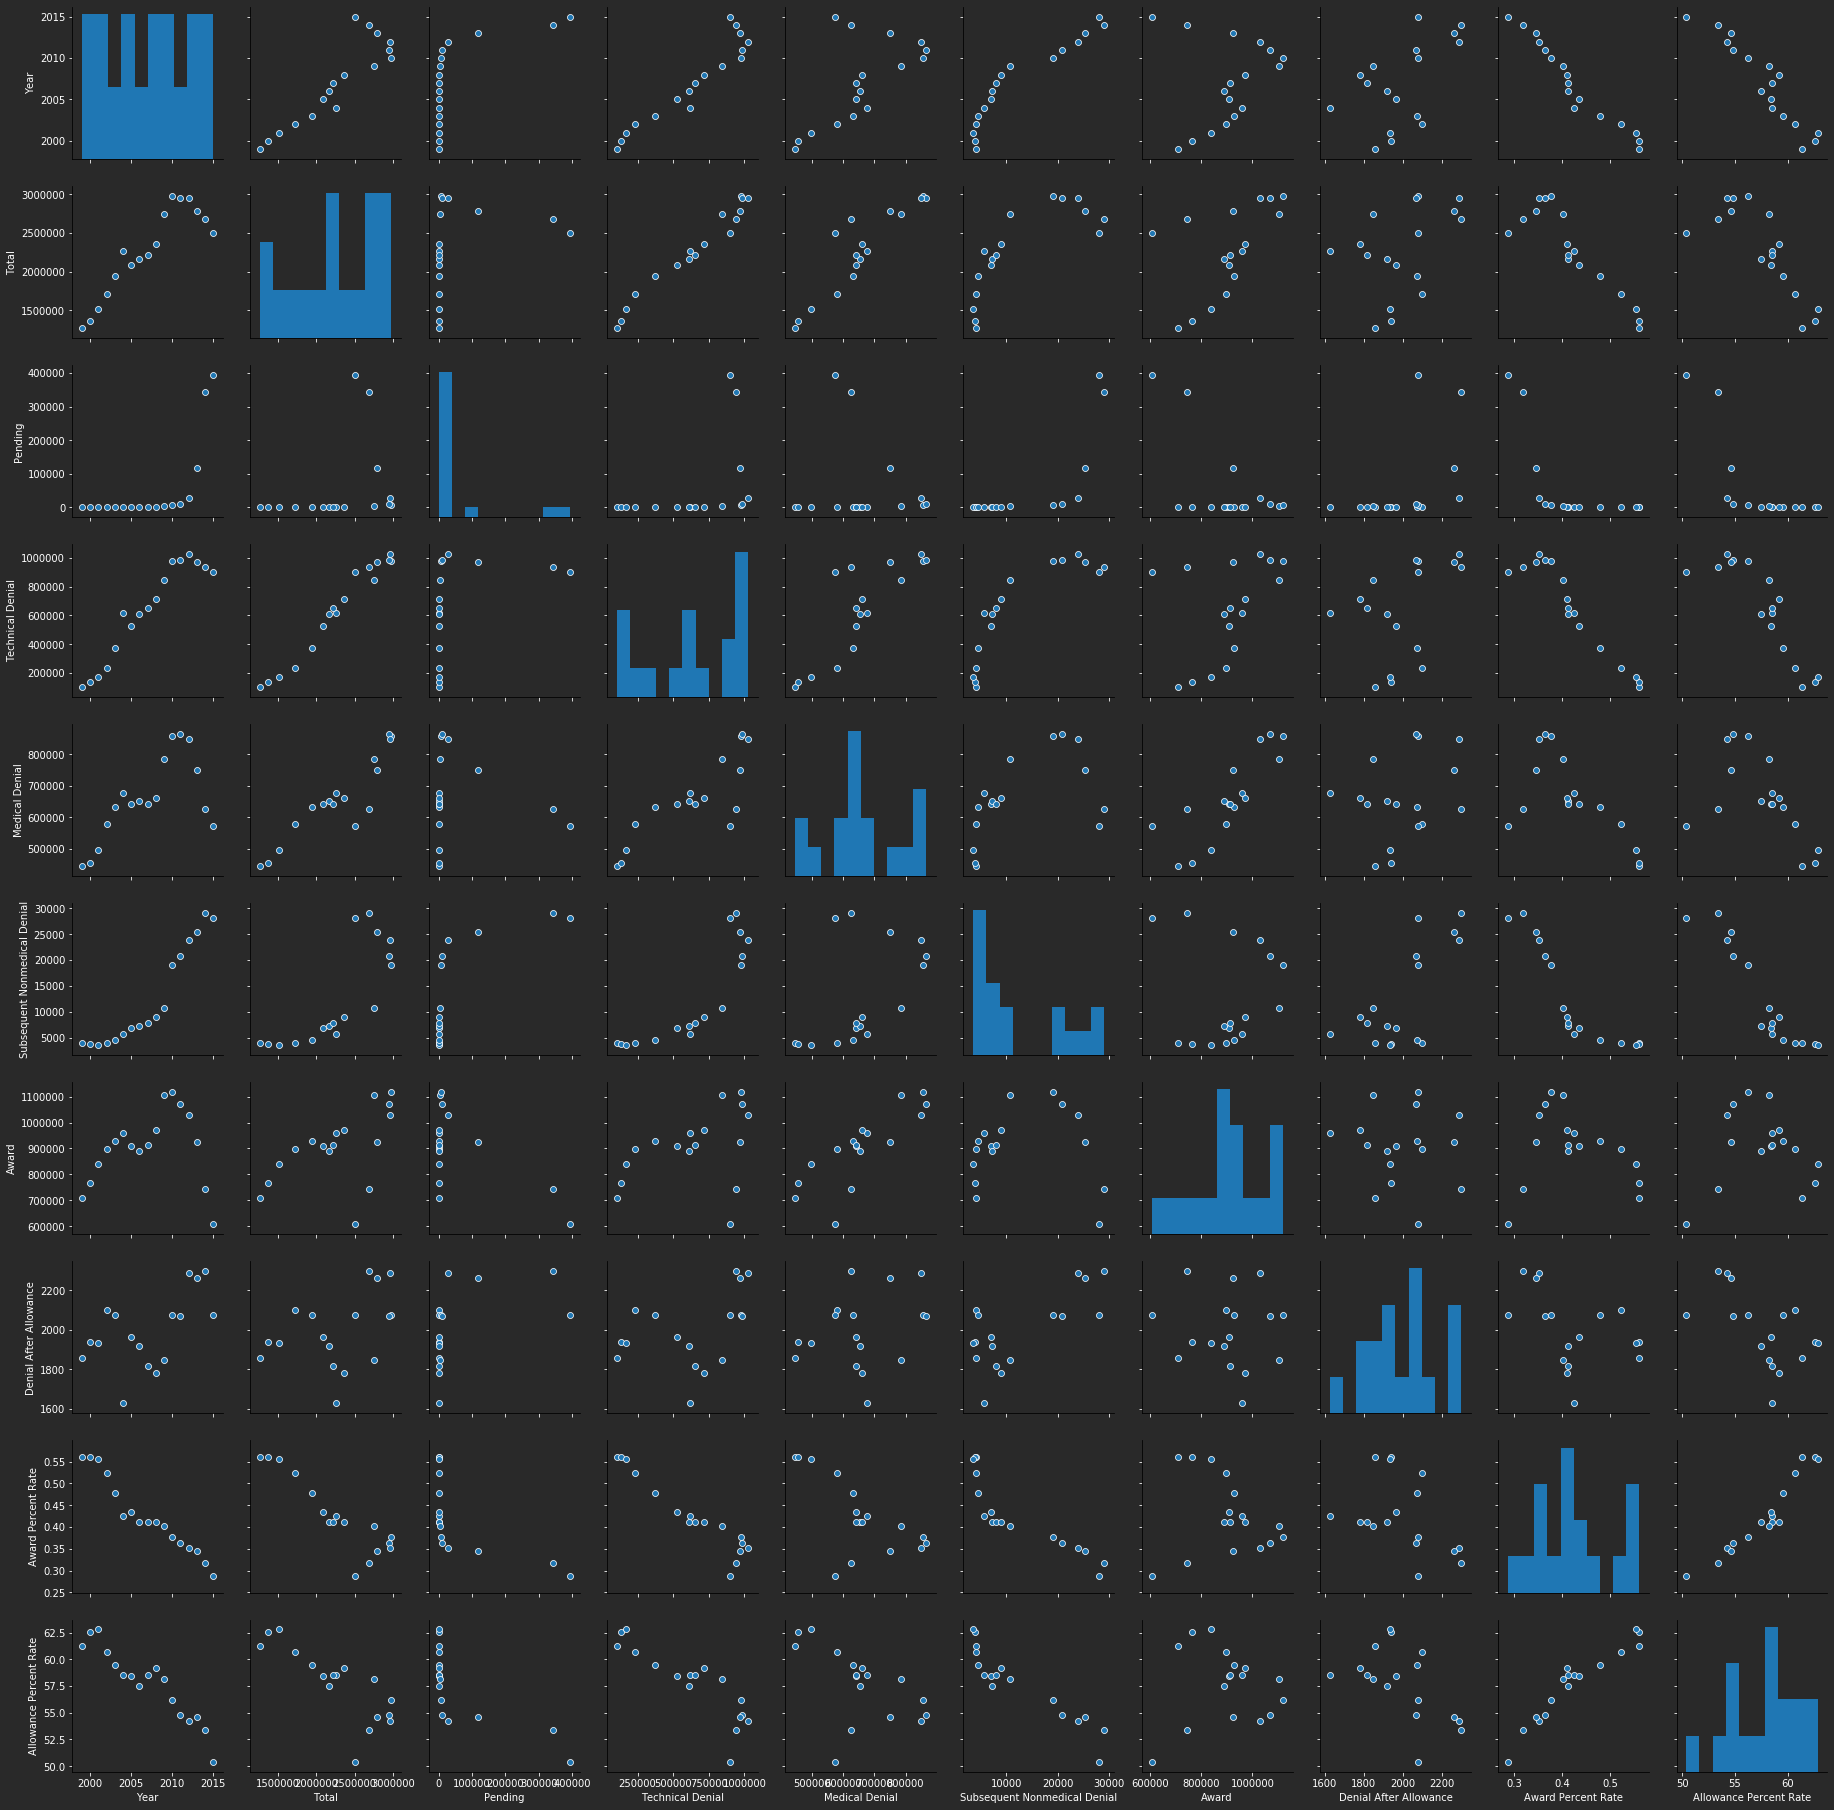

In [25]:
# Additional exploratory data anysis with Seaborn

g = sns.pairplot(df1,
                 x_vars=['Year','Total','Pending',
               'Technical Denial','Medical Denial','Subsequent Nonmedical Denial',
               'Award','Denial After Allowance','Award Percent Rate', "Allowance Percent Rate"],
                 y_vars=['Year','Total','Pending',
               'Technical Denial','Medical Denial','Subsequent Nonmedical Denial',
               'Award','Denial After Allowance','Award Percent Rate', "Allowance Percent Rate"])

In [26]:
# Import additional social security data on csv
# csv was created by scraping website with 3rd party software, then saving to github

df2 = pd.read_csv('https://raw.githubusercontent.com/ChicagoDataScientist/datafiles/master/june_disposition.csv')
df2.head(20)

,Judge,Office,Total Dispositions,Tot,Decisions,Awards,Denials,Fully Favorable,Partially Favorable
0,"Beatty, Gregory M",AKRON OH,378,378,308,120,188,92,28
1,"Ciccolini, Thomas A",AKRON OH,457,457,392,286,106,265,21
2,"Goodrich, Paula J",AKRON OH,312,312,273,145,128,110,35
3,"Hajjar, Joseph G",AKRON OH,112,310,89,28,61,26,2
4,"Kearney, Keith J",AKRON OH,93,262,80,31,49,28,3
5,"Kidd, M. S",AKRON OH,277,277,217,106,111,96,10
6,"Leibowitz, Tracey B",AKRON OH,2,375,2,0,2,0,0
7,"Lohr, Mary",AKRON OH,368,368,309,168,141,131,37
8,"Ma, Catherine",AKRON OH,23,184,17,5,12,4,1
9,"Raeber, Jeffrey",AKRON OH,344,344,279,134,145,121,13


In [27]:
# Examine data types

df2.dtypes

Judge                  object
Office                 object
Total Dispositions      int64
Tot                     int64
Decisions               int64
Awards                  int64
Denials                 int64
Fully Favorable         int64
Partially Favorable     int64
dtype: object

In [0]:
# Remove unnecessary features

df2 = df2.drop(['Tot'], axis=1)

In [29]:
df2.head()

,Judge,Office,Total Dispositions,Decisions,Awards,Denials,Fully Favorable,Partially Favorable
0,"Beatty, Gregory M",AKRON OH,378,308,120,188,92,28
1,"Ciccolini, Thomas A",AKRON OH,457,392,286,106,265,21
2,"Goodrich, Paula J",AKRON OH,312,273,145,128,110,35
3,"Hajjar, Joseph G",AKRON OH,112,89,28,61,26,2
4,"Kearney, Keith J",AKRON OH,93,80,31,49,28,3


In [0]:
# Create new features

df2['Award Pct']=df2['Awards']/df2['Decisions']
df2['Backlog']=df2['Total Dispositions']-df2['Decisions']
df2['Denial Pct'] = 1- df2['Award Pct']

In [0]:
# Rename columns

df2.rename(columns = {'Total Dispositions':'Cases'}, inplace = True) 
df2.rename(columns = {'Fully Favorable':'Favorable'}, inplace = True) 
df2.rename(columns = {'Total Dispositions':'Cases'}, inplace = True) 
df2.rename(columns = {'Partially Favorable':'Partial Fav'}, inplace = True) 

In [0]:
# Create new feature

df2['Backlog Pct']=df2['Backlog']/df2['Decisions']

In [33]:
# Check work

df2.head()

,Judge,Office,Cases,Decisions,Awards,Denials,Favorable,Partial Fav,Award Pct,Backlog,Denial Pct,Backlog Pct
0,"Beatty, Gregory M",AKRON OH,378,308,120,188,92,28,0.389610,70,0.610390,0.227273
1,"Ciccolini, Thomas A",AKRON OH,457,392,286,106,265,21,0.729592,65,0.270408,0.165816
2,"Goodrich, Paula J",AKRON OH,312,273,145,128,110,35,0.531136,39,0.468864,0.142857
3,"Hajjar, Joseph G",AKRON OH,112,89,28,61,26,2,0.314607,23,0.685393,0.258427
4,"Kearney, Keith J",AKRON OH,93,80,31,49,28,3,0.387500,13,0.612500,0.162500


In [34]:
# Look for patterns in data

df2.corr()

,Cases,Decisions,Awards,Denials,Favorable,Partial Fav,Award Pct,Backlog,Denial Pct,Backlog Pct
Cases,1.000000,0.989000,0.866321,0.838814,0.824446,0.575391,0.020408,0.840528,-0.020408,-0.162525
Decisions,0.989000,1.000000,0.886276,0.835915,0.843949,0.586143,0.035225,0.751147,-0.035225,-0.201828
Awards,0.866321,0.886276,1.000000,0.486642,0.984222,0.505399,0.381257,0.620176,-0.381257,-0.186472
Denials,0.838814,0.835915,0.486642,1.000000,0.425504,0.506658,-0.385576,0.681870,0.385576,-0.157014
Favorable,0.824446,0.843949,0.984222,0.425504,1.000000,0.344745,0.412413,0.588320,-0.412413,-0.175083
Partial Fav,0.575391,0.586143,0.505399,0.506658,0.344745,1.000000,0.006126,0.421068,-0.006126,-0.131970
Award Pct,0.020408,0.035225,0.381257,-0.385576,0.412413,0.006126,1.000000,-0.037849,-1.000000,-0.064297
Backlog,0.840528,0.751147,0.620176,0.681870,0.588320,0.421068,-0.037849,1.000000,0.037849,0.013485
Denial Pct,-0.020408,-0.035225,-0.381257,0.385576,-0.412413,-0.006126,-1.000000,0.037849,1.000000,0.064297
Backlog Pct,-0.162525,-0.201828,-0.186472,-0.157014,-0.175083,-0.131970,-0.064297,0.013485,0.064297,1.000000


In [35]:
 # Look for patterrns in data

df2.describe()

,Cases,Decisions,Awards,Denials,Favorable,Partial Fav,Award Pct,Backlog,Denial Pct,Backlog Pct
count,1855.000000,1855.000000,1855.000000,1855.000000,1855.000000,1855.000000,1825.000000,1855.000000,1825.000000,1855.000000
mean,255.376280,204.287871,111.553639,92.734232,95.974663,15.578976,0.542740,51.088410,0.457260,inf
std,138.220458,113.436580,71.269027,60.140791,65.513250,13.433888,0.176013,30.970612,0.176013,NaN
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,147.000000,112.500000,55.000000,44.000000,43.000000,6.000000,0.431925,28.000000,0.346667,0.183988
50%,291.000000,230.000000,114.000000,93.000000,94.000000,13.000000,0.538462,54.000000,0.461538,0.243655
75%,363.000000,293.000000,161.000000,138.500000,141.000000,22.000000,0.653333,71.000000,0.568075,0.311507
max,556.000000,465.000000,360.000000,302.000000,324.000000,115.000000,1.000000,238.000000,1.000000,inf


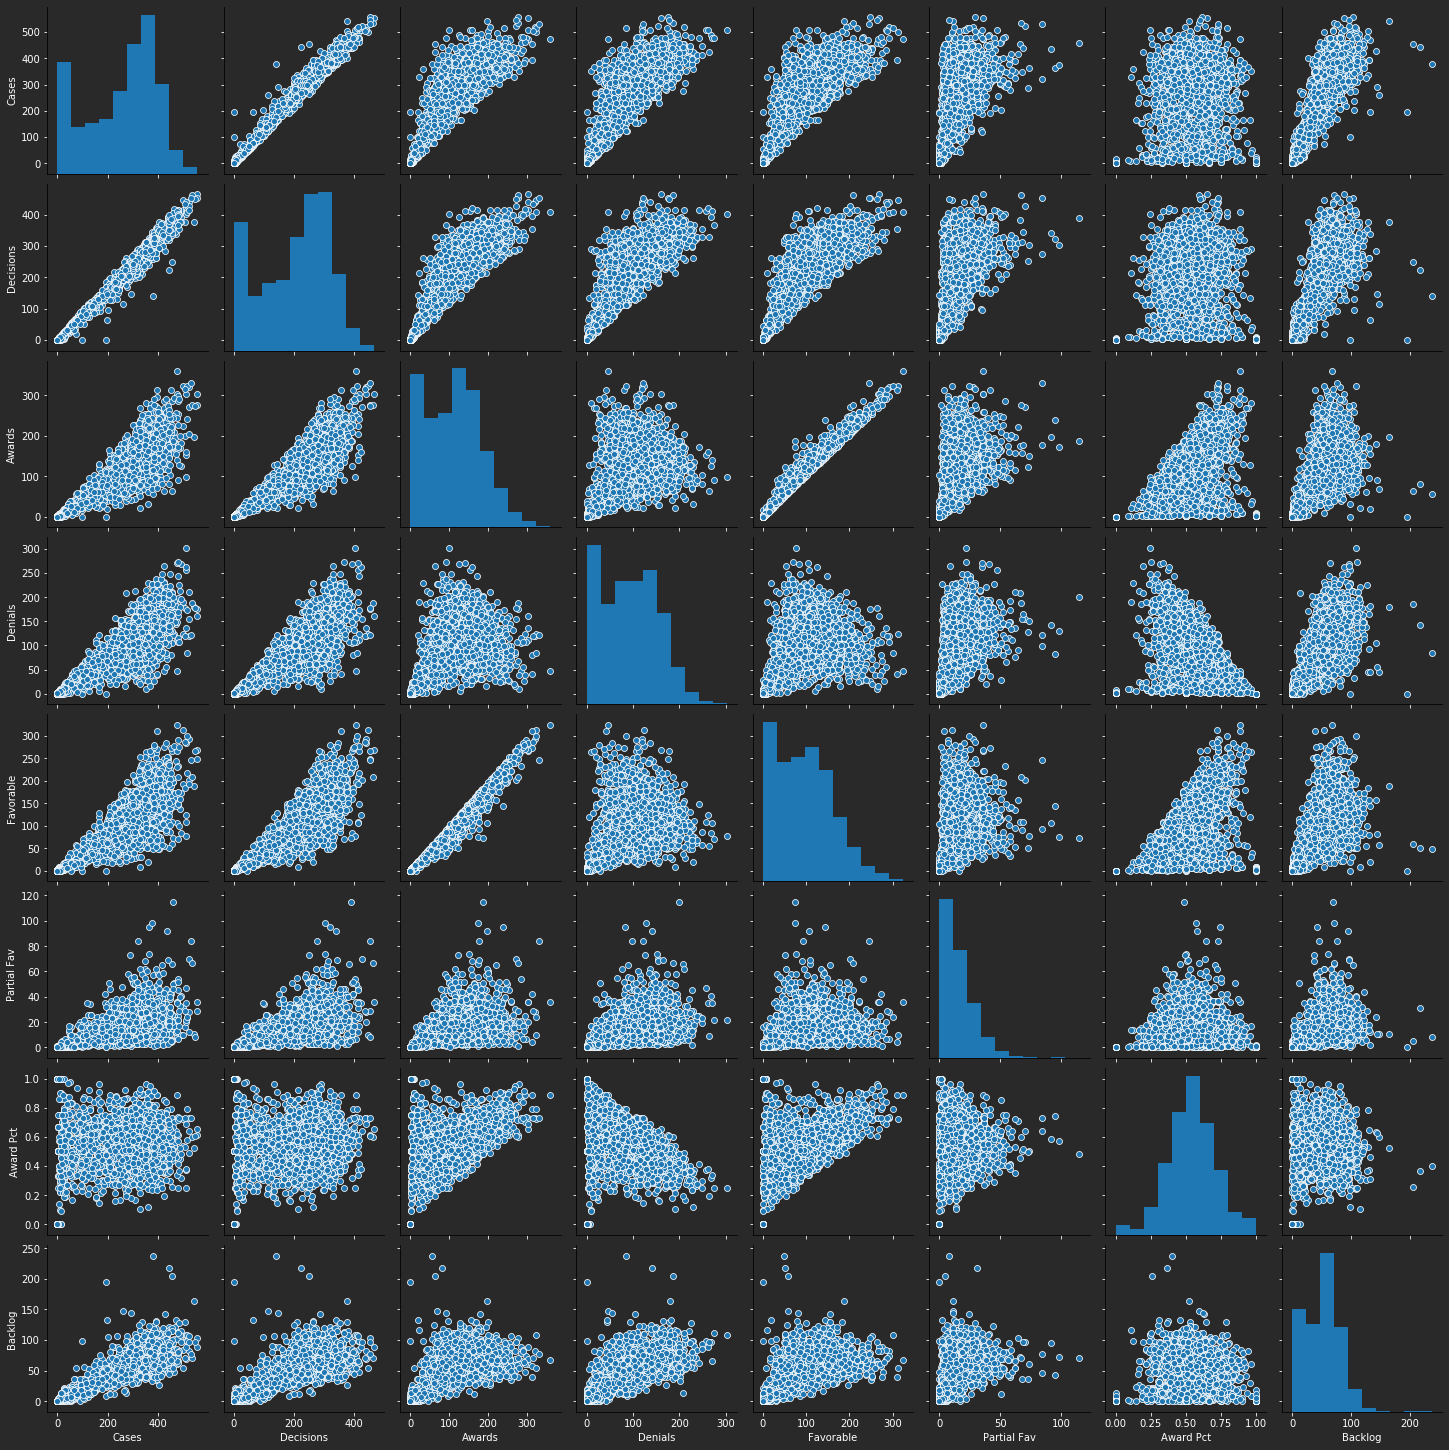

In [36]:
# This takes a long time to run!
# Explore Data using Seaborn

g = sns.pairplot(df2,
                 x_vars=['Cases', 'Decisions','Awards','Denials', 'Favorable', 'Partial Fav', 'Award Pct', 'Backlog'],
                 y_vars=['Cases', 'Decisions','Awards','Denials', 'Favorable', 'Partial Fav', 'Award Pct', 'Backlog'])

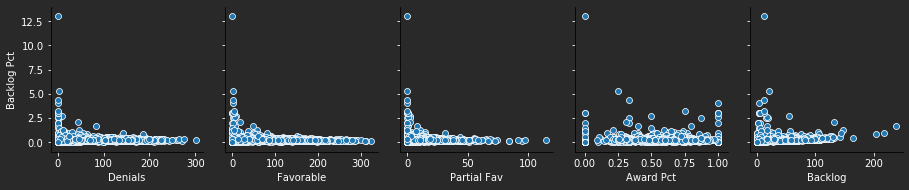

In [37]:
# More data exploration with Seaborn

g = sns.pairplot(df2,
                 x_vars=['Denials', 'Favorable', 'Partial Fav', 'Award Pct', 'Backlog'],
                 y_vars=['Backlog Pct'])

In [38]:
# Examine data by office

df2['Office'].value_counts().head(10)

BALTIMORE        24
FT LAUDERDALE    24
SAN ANTONIO      22
CLEVELAND        21
BIRMINGHAM       20
DALLAS NORTH     19
CHICAGO          19
TAMPA            19
ELKINS PARK      17
MOBILE           17
Name: Office, dtype: int64

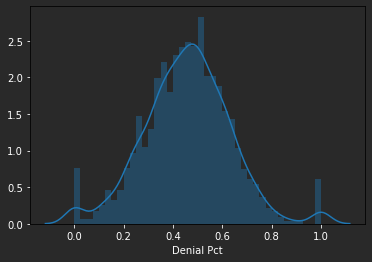

In [39]:
#  create denial histogram by office

sns.distplot(df2['Denial Pct'], bins=40)

In [0]:
# sns.set_style({'axes.facecolor': '#292929',
#  'figure.facecolor': '#292929', 'axes.labelcolor': 'w',
#  'text.color': 'w',
#  'xtick.color': 'w',
#  'ytick.color': 'w',
#  })

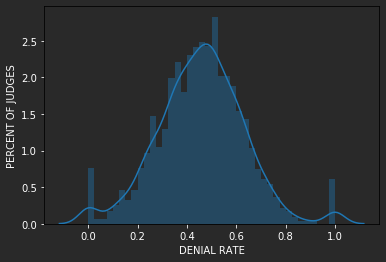

<Figure size 432x288 with 0 Axes>

In [40]:
# Testing various graphing parameters for presentation

# sns.set(style="ticks", context="talk")
# plt.style.use("dark_background")
sns.distplot(df2['Denial Pct'], bins=40)
# plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), shadow=True, ncol=2)
plt.xlabel('DENIAL RATE')
plt.ylabel('PERCENT OF JUDGES')
plt.show()
fig = plt.figure()
# ax = fig.add_subplot(111)
# plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), shadow=True, ncol=2)
# plt.xlabel('YEAR')
# plt.ylabel('PROPORTION OF TOTAL CASES')
# plt.show()
# ax.plot(range(10))
# ax.set_xlabel('X-axis')
# ax.set_ylabel('Y-axis')

# ax.spines['bottom'].set_color('red')
# ax.spines['top'].set_color('red')
# ax.xaxis.label.set_color('red')
# ax.tick_params(axis='x', colors='red')

# ax.tick_params(direction='out', length=6, width=2, colors='r',
#                grid_color='r', grid_alpha=0.5)
# plt.show()

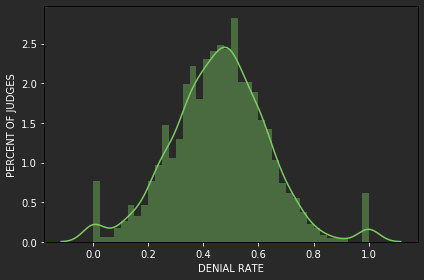

In [41]:
# Export green graph for presentation

dist_plot = sns.distplot(df2['Denial Pct'], bins=40, color='#7CCC62')
plt.xlabel('DENIAL RATE')
plt.ylabel('PERCENT OF JUDGES')
plt.tight_layout()
plt.savefig('histogram.png')

In [42]:
# Look for insights within descriprive statistics

df2.describe()

,Cases,Decisions,Awards,Denials,Favorable,Partial Fav,Award Pct,Backlog,Denial Pct,Backlog Pct
count,1855.000000,1855.000000,1855.000000,1855.000000,1855.000000,1855.000000,1825.000000,1855.000000,1825.000000,1855.000000
mean,255.376280,204.287871,111.553639,92.734232,95.974663,15.578976,0.542740,51.088410,0.457260,inf
std,138.220458,113.436580,71.269027,60.140791,65.513250,13.433888,0.176013,30.970612,0.176013,NaN
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,147.000000,112.500000,55.000000,44.000000,43.000000,6.000000,0.431925,28.000000,0.346667,0.183988
50%,291.000000,230.000000,114.000000,93.000000,94.000000,13.000000,0.538462,54.000000,0.461538,0.243655
75%,363.000000,293.000000,161.000000,138.500000,141.000000,22.000000,0.653333,71.000000,0.568075,0.311507
max,556.000000,465.000000,360.000000,302.000000,324.000000,115.000000,1.000000,238.000000,1.000000,inf


In [43]:
# Examine sum data

df2.sum()

Judge          Beatty, Gregory MCiccolini, Thomas AGoodrich, ...
Office         AKRON OHAKRON OHAKRON OHAKRON OHAKRON OHAKRON ...
Cases                                                     473723
Decisions                                                 378954
Awards                                                    206932
Denials                                                   172022
Favorable                                                 178033
Partial Fav                                                28899
Award Pct                                                990.501
Backlog                                                    94769
Denial Pct                                               834.499
Backlog Pct                                                  inf
dtype: object

In [0]:
# Create new dataframe for office level anaysis

df3 = df2.groupby('Office').sum()

In [0]:
# Save office level data to csv

df2.to_csv('df2.csv')

In [46]:
# Examine new dataframe

df3

,Cases,Decisions,Awards,Denials,Favorable,Partial Fav,Award Pct,Backlog,Denial Pct,Backlog Pct
Office,,,,,,,,,,
AKRON OH,3131,2636,1376,1260,1168,208,5.794542,495,7.205458,2.459468
ALBANY,3231,2665,1754,911,1542,212,6.659490,566,3.340510,2.160466
ALBUQUERQUE,2638,2227,1338,889,1108,230,6.243035,411,4.756965,inf
ALEXANDRIA,3635,2973,1394,1579,1175,219,5.388640,662,5.611360,2.720776
ANCHORAGE AK,484,351,116,235,77,39,0.653818,133,1.346182,0.770602
...,...,...,...,...,...,...,...,...,...,...
WASHINGTON,2668,1987,1007,980,863,144,4.581885,681,4.418115,3.092952
WEST DES MOINES,1932,1584,880,704,754,126,4.159827,348,3.840173,inf
WHITE PLAINS,2595,2019,1099,920,872,227,5.549783,576,4.450217,2.786180


In [0]:
# Create new features

df3['Award Pct']=df3['Awards']/df3['Decisions']
df3['Backlog']=df3['Cases']-df3['Decisions']
df3['Backlog Pct']=df3['Backlog']/df3['Decisions']
df3['Partial Pct']=df3['Partial Fav']/df3['Decisions']

In [48]:
# Check work

df3

,Cases,Decisions,Awards,Denials,Favorable,Partial Fav,Award Pct,Backlog,Denial Pct,Backlog Pct,Partial Pct
Office,,,,,,,,,,,
AKRON OH,3131,2636,1376,1260,1168,208,0.522003,495,7.205458,0.187785,0.078907
ALBANY,3231,2665,1754,911,1542,212,0.658161,566,3.340510,0.212383,0.079550
ALBUQUERQUE,2638,2227,1338,889,1108,230,0.600808,411,4.756965,0.184553,0.103278
ALEXANDRIA,3635,2973,1394,1579,1175,219,0.468887,662,5.611360,0.222671,0.073663
ANCHORAGE AK,484,351,116,235,77,39,0.330484,133,1.346182,0.378917,0.111111
...,...,...,...,...,...,...,...,...,...,...,...
WASHINGTON,2668,1987,1007,980,863,144,0.506794,681,4.418115,0.342728,0.072471
WEST DES MOINES,1932,1584,880,704,754,126,0.555556,348,3.840173,0.219697,0.079545
WHITE PLAINS,2595,2019,1099,920,872,227,0.544329,576,4.450217,0.285290,0.112432


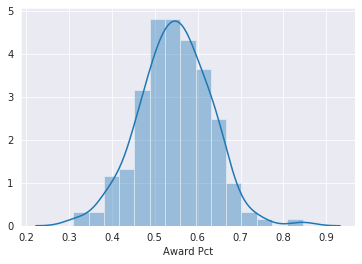

In [49]:
# Create histogram for office approval rates

sns.set_style('darkgrid')
sns.distplot(df3['Award Pct'])

In [51]:
# Examine descriptive statistics for offices

df3.describe()

,Cases,Decisions,Awards,Denials,Favorable,Partial Fav,Award Pct,Backlog,Denial Pct,Backlog Pct,Partial Pct
count,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,169.000000,170.000000,170.000000,170.000000,169.000000
mean,2786.605882,2229.141176,1217.247059,1011.894118,1047.252941,169.994118,0.547048,557.464706,4.908817,inf,0.079052
std,1178.873237,941.508385,536.541553,472.985032,489.189670,73.841306,0.082065,270.549761,2.120496,NaN,0.025008
min,294.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.310200,84.000000,0.000000,0.137457,0.019855
25%,1887.250000,1520.500000,845.000000,686.750000,691.000000,126.000000,0.496724,348.500000,3.446352,0.207106,0.061375
50%,2595.500000,2124.500000,1093.500000,940.000000,916.000000,169.000000,0.550702,514.000000,4.567635,0.241251,0.077609
75%,3556.750000,2857.750000,1546.750000,1292.250000,1360.750000,215.000000,0.600493,724.250000,6.105660,0.283647,0.095797
max,6383.000000,5015.000000,2745.000000,2869.000000,2549.000000,353.000000,0.844553,1566.000000,13.270965,inf,0.160547


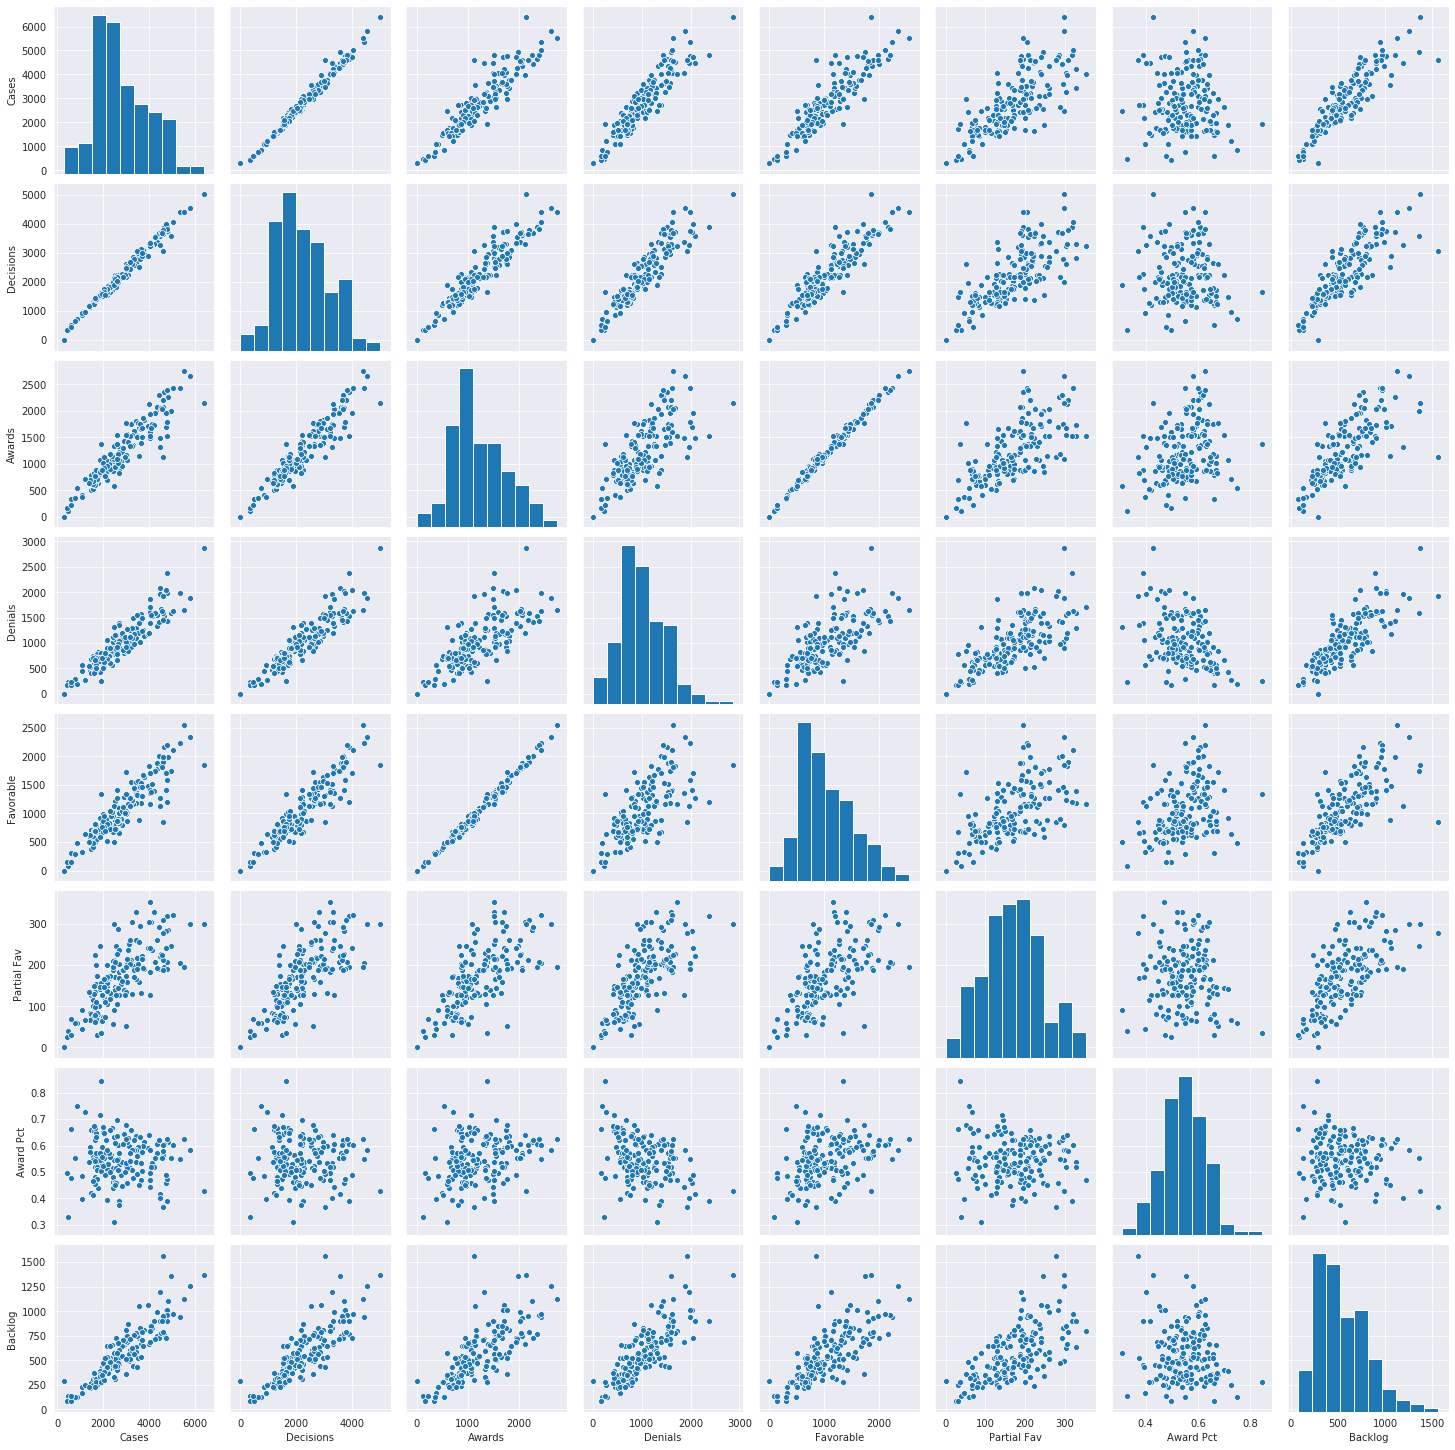

In [52]:
# Look for patterns in office behavior
# This takes a long time to run!

g = sns.pairplot(df3,
                 x_vars=['Cases', 'Decisions','Awards','Denials', 'Favorable', 'Partial Fav', 'Award Pct', 'Backlog'],
                 y_vars=['Cases', 'Decisions','Awards','Denials', 'Favorable', 'Partial Fav', 'Award Pct', 'Backlog'])

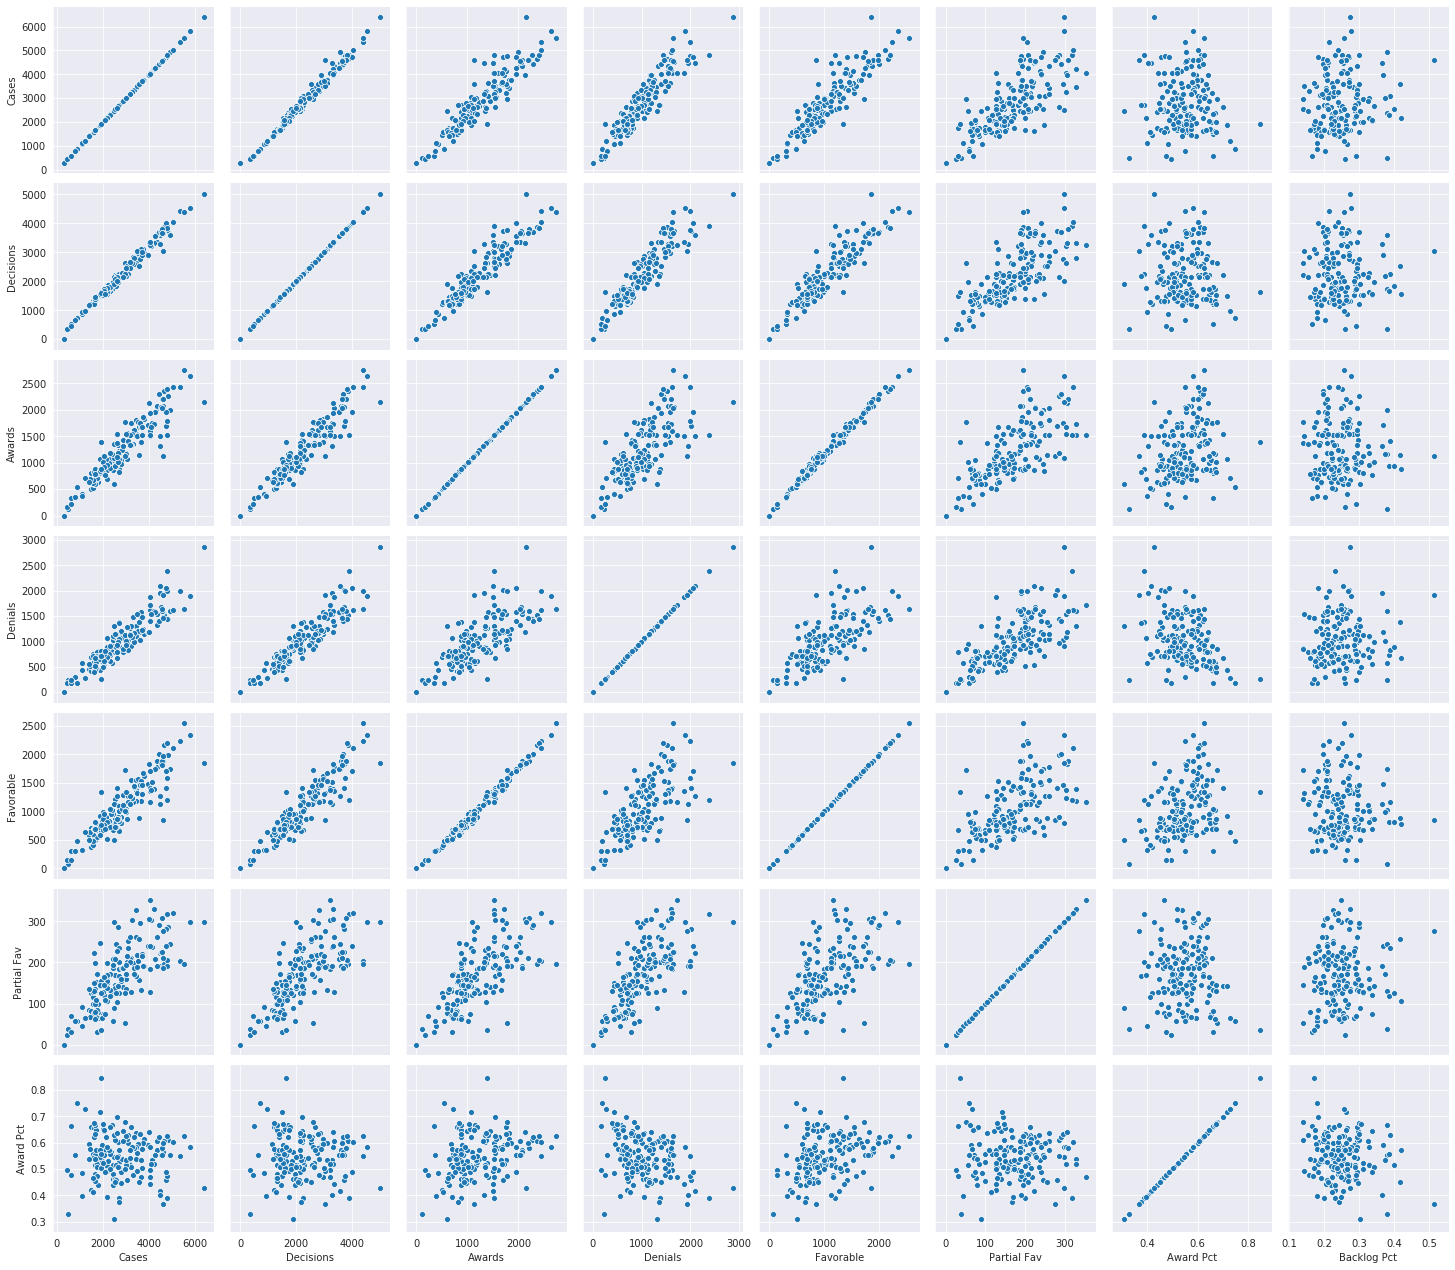

In [53]:
# Look for patterns in office behavior

g = sns.pairplot(df3,
                 x_vars=['Cases', 'Decisions','Awards','Denials', 'Favorable', 'Partial Fav', 'Award Pct', 'Backlog Pct'],
                 y_vars=['Cases', 'Decisions','Awards','Denials', 'Favorable', 'Partial Fav', 'Award Pct'])

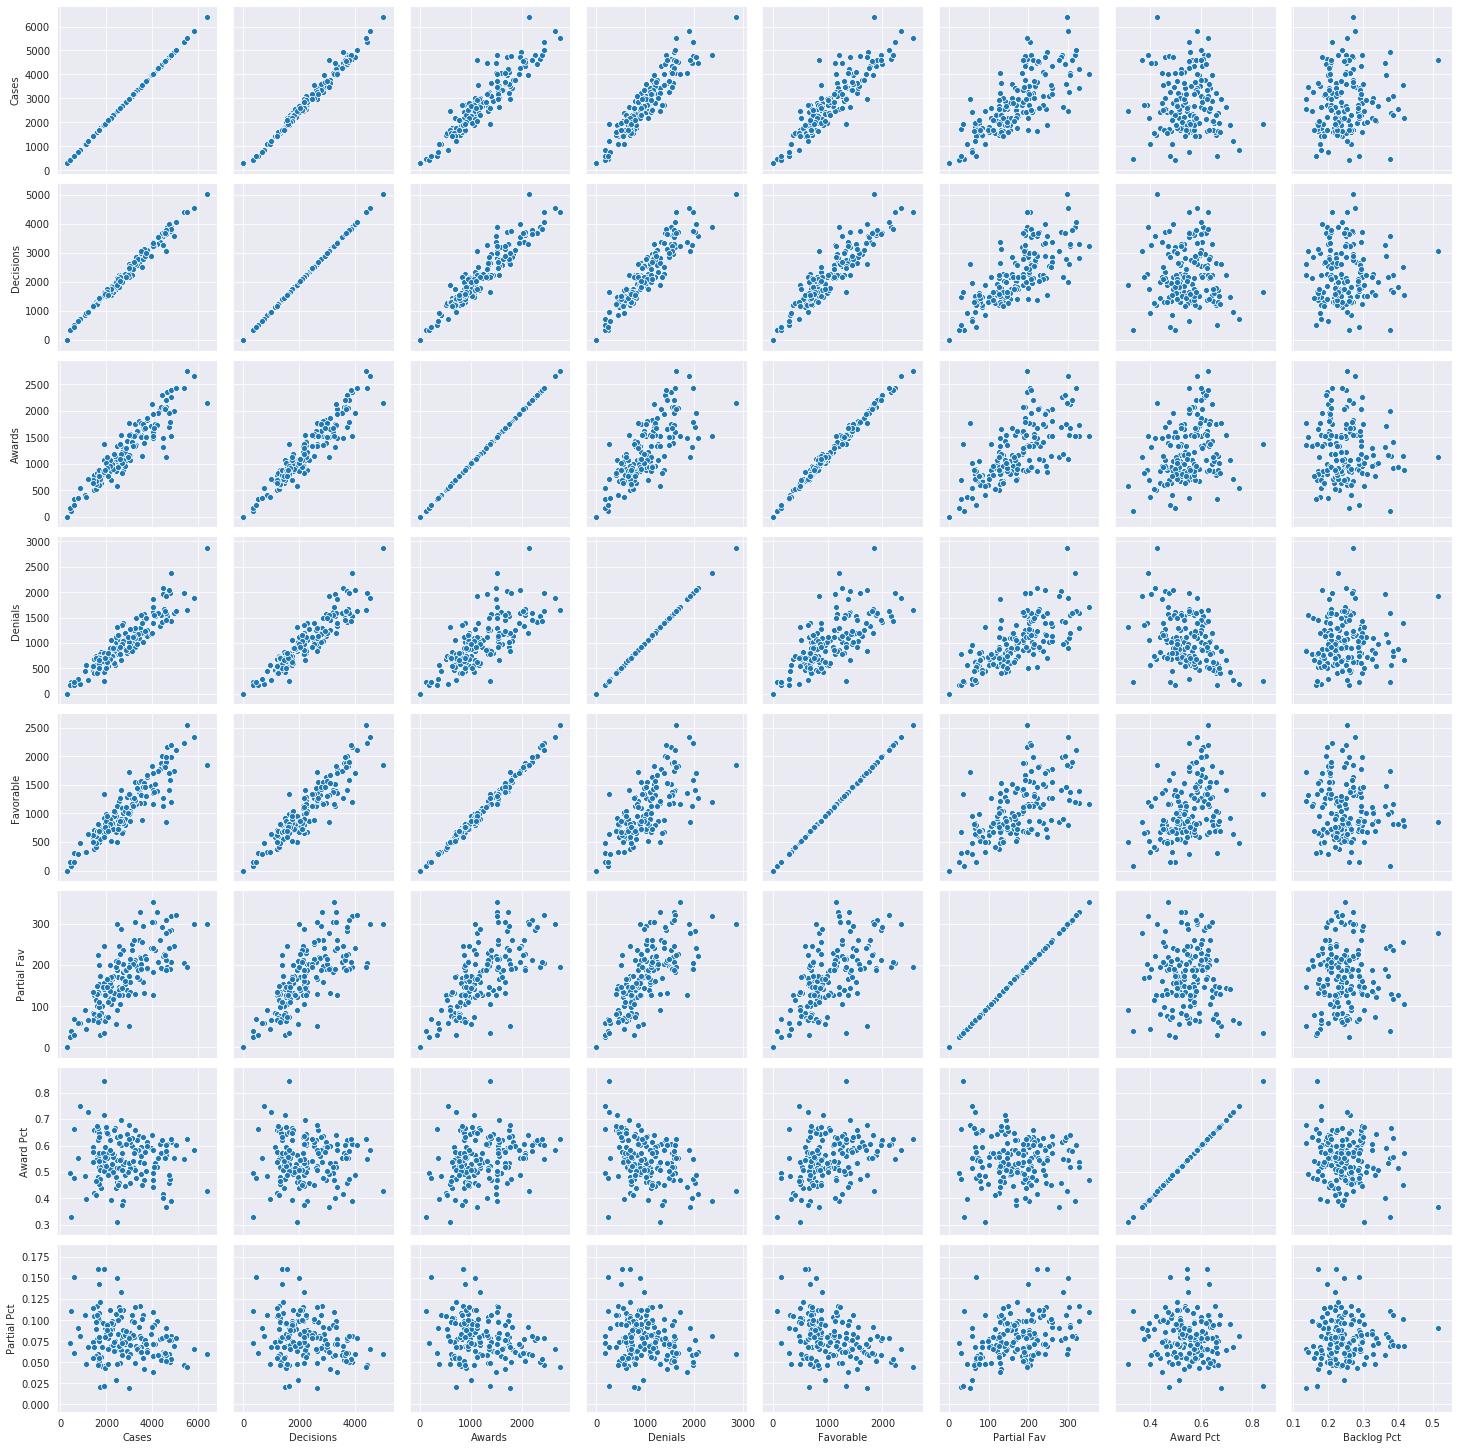

In [54]:
# Look for patterns in office behavior

g = sns.pairplot(df3,
                 x_vars=['Cases', 'Decisions','Awards','Denials', 'Favorable', 'Partial Fav', 'Award Pct', 'Backlog Pct'],
                 y_vars=['Cases', 'Decisions','Awards','Denials', 'Favorable', 'Partial Fav', 'Award Pct', 'Partial Pct'])

In [55]:
# Look for correlations in office behavior

df3.corr()

,Cases,Decisions,Awards,Denials,Favorable,Partial Fav,Award Pct,Backlog,Denial Pct,Backlog Pct,Partial Pct
Cases,1.000000,0.992407,0.925378,0.925729,0.902683,0.743762,-0.048570,0.903766,0.736471,0.122569,-0.260466
Decisions,0.992407,1.000000,0.940893,0.923243,0.920215,0.740349,-0.029228,0.844258,0.712280,0.006851,-0.271221
Awards,0.925378,0.940893,1.000000,0.738537,0.993884,0.681781,0.282126,0.757880,0.544664,-0.051698,-0.277509
Denials,0.925729,0.923243,0.738537,1.000000,0.704315,0.700321,-0.377475,0.820833,0.799989,0.072136,-0.223934
Favorable,0.902683,0.920215,0.993884,0.704315,1.000000,0.596829,0.319179,0.730950,0.504282,-0.066779,-0.364084
Partial Fav,0.743762,0.740349,0.681781,0.700321,0.596829,1.000000,-0.068240,0.664412,0.616798,0.067554,0.399959
Award Pct,-0.048570,-0.029228,0.282126,-0.377475,0.319179,-0.068240,1.000000,-0.109107,-0.335909,-0.173096,-0.088168
Backlog,0.903766,0.844258,0.757880,0.820833,0.730950,0.664412,-0.109107,1.000000,0.730324,0.504907,-0.192312
Denial Pct,0.736471,0.712280,0.544664,0.799989,0.504282,0.616798,-0.335909,0.730324,1.000000,0.229367,-0.085146
Backlog Pct,0.122569,0.006851,-0.051698,0.072136,-0.066779,0.067554,-0.173096,0.504907,0.229367,1.000000,0.071339


In [56]:
#Compare office median award rate

df3.groupby('Office')['Award Pct'].median()

Office
AKRON OH           0.522003
ALBANY             0.658161
ALBUQUERQUE        0.600808
ALEXANDRIA         0.468887
ANCHORAGE AK       0.330484
                     ...   
WASHINGTON         0.506794
WEST DES MOINES    0.555556
WHITE PLAINS       0.544329
WICHITA            0.487179
WILKES BARRE       0.504168
Name: Award Pct, Length: 170, dtype: float64

In [57]:
#Compare office mean award rate

df2.groupby('Office')['Award Pct'].mean()

Office
AKRON OH           0.445734
ALBANY             0.665949
ALBUQUERQUE        0.567549
ALEXANDRIA         0.489876
ANCHORAGE AK       0.326909
                     ...   
WASHINGTON         0.509098
WEST DES MOINES    0.519978
WHITE PLAINS       0.554978
WICHITA            0.444747
WILKES BARRE       0.478907
Name: Award Pct, Length: 170, dtype: float64